In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
url = 'https://github.com/nytimes/covid-19-data/blob/master/us-counties-2020.csv?raw=true'
df = pd.read_csv(url)

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df_first_wave = df[df['date'] < '06/30/2020']

In [10]:
treatment_states = ['Minnesota', 'Montana','Nevada','North Carolina','Rhode Island', 'Alabama','Arizona','Florida','Georgia','Kansas','Maine','Maryland','Mississippi','Missouri','New Hampshire','South Carolina','Tennesse','Texas','Utah','Virgina']

In [11]:
control_states = ['Arkansas','Iowa','Nebraska','North Dakota','Oklahoma', 'South Dakota', 'Wyoming']

In [12]:
treatment_df = df_first_wave[df_first_wave['state'].isin(treatment_states)]

In [13]:
control_df = df_first_wave[df_first_wave['state'].isin(control_states)]

In [14]:
control_df['Treatment'] = False

/tmp/ipykernel_17355/1425731934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_df['Treatment'] = False


In [15]:
treatment_df['Treatment'] = True

/tmp/ipykernel_17355/283517631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_df['Treatment'] = True


In [16]:
treatment_df

,date,county,state,fips,cases,deaths,Treatment
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0,True
13,2020-01-27,Maricopa,Arizona,4013.0,1,0.0,True
18,2020-01-28,Maricopa,Arizona,4013.0,1,0.0,True
23,2020-01-29,Maricopa,Arizona,4013.0,1,0.0,True
28,2020-01-30,Maricopa,Arizona,4013.0,1,0.0,True
...,...,...,...,...,...,...,...
286736,2020-06-29,Unknown,Utah,NaN,0,9.0,True
286737,2020-06-29,Utah,Utah,49049.0,3965,22.0,True
286738,2020-06-29,Wasatch,Utah,49051.0,406,3.0,True
286739,2020-06-29,Washington,Utah,49053.0,1156,0.0,True


In [17]:
combined_df = pd.concat([control_df, treatment_df])
combined_df

,date,county,state,fips,cases,deaths,Treatment
198,2020-02-17,Douglas,Nebraska,31055.0,10,0.0,False
210,2020-02-18,Douglas,Nebraska,31055.0,10,0.0,False
222,2020-02-19,Douglas,Nebraska,31055.0,10,0.0,False
235,2020-02-20,Douglas,Nebraska,31055.0,11,0.0,False
249,2020-02-21,Douglas,Nebraska,31055.0,11,0.0,False
...,...,...,...,...,...,...,...
286736,2020-06-29,Unknown,Utah,NaN,0,9.0,True
286737,2020-06-29,Utah,Utah,49049.0,3965,22.0,True
286738,2020-06-29,Wasatch,Utah,49051.0,406,3.0,True
286739,2020-06-29,Washington,Utah,49053.0,1156,0.0,True


In [18]:
combined_df['county'].value_counts()

county
Washington    1607
Lincoln       1244
Clay          1227
Jackson       1202
Unknown       1157
              ... 
Granite          5
Hettinger        4
Elk              4
Eureka           4
Rush             1
Name: count, Length: 1121, dtype: int64

## Dropping values where 'county' is 'Unknown' as there is no way to impute. Losing 1157 records of 150050 initial total (0.77%)

In [19]:
#drop unknown county
combined_df = combined_df[combined_df['county'] != 'Unknown']
combined_df

,date,county,state,fips,cases,deaths,Treatment
198,2020-02-17,Douglas,Nebraska,31055.0,10,0.0,False
210,2020-02-18,Douglas,Nebraska,31055.0,10,0.0,False
222,2020-02-19,Douglas,Nebraska,31055.0,10,0.0,False
235,2020-02-20,Douglas,Nebraska,31055.0,11,0.0,False
249,2020-02-21,Douglas,Nebraska,31055.0,11,0.0,False
...,...,...,...,...,...,...,...
286735,2020-06-29,Uintah,Utah,49047.0,30,0.0,True
286737,2020-06-29,Utah,Utah,49049.0,3965,22.0,True
286738,2020-06-29,Wasatch,Utah,49051.0,406,3.0,True
286739,2020-06-29,Washington,Utah,49053.0,1156,0.0,True


## Drop records where the 'county' is the same as the 'state.' These are considered to be state-wide counts of deaths and cases. Dropping 440 of 148893 current total of records (0.2%)

In [20]:
combined_df[combined_df['county'] == combined_df['state']]

,date,county,state,fips,cases,deaths,Treatment
1834,2020-03-13,Oklahoma,Oklahoma,40109.0,1,0.0,False
2195,2020-03-14,Oklahoma,Oklahoma,40109.0,1,0.0,False
2613,2020-03-15,Oklahoma,Oklahoma,40109.0,1,0.0,False
3077,2020-03-16,Oklahoma,Oklahoma,40109.0,2,0.0,False
3604,2020-03-17,Oklahoma,Oklahoma,40109.0,6,0.0,False
...,...,...,...,...,...,...,...
274149,2020-06-25,Utah,Utah,49049.0,3541,22.0,True
277297,2020-06-26,Utah,Utah,49049.0,3675,22.0,True
280445,2020-06-27,Utah,Utah,49049.0,3751,22.0,True
283591,2020-06-28,Utah,Utah,49049.0,3850,22.0,True


In [21]:
#drop where state == county
combined_df = combined_df[combined_df['county'] != combined_df['state']]
combined_df


,date,county,state,fips,cases,deaths,Treatment
198,2020-02-17,Douglas,Nebraska,31055.0,10,0.0,False
210,2020-02-18,Douglas,Nebraska,31055.0,10,0.0,False
222,2020-02-19,Douglas,Nebraska,31055.0,10,0.0,False
235,2020-02-20,Douglas,Nebraska,31055.0,11,0.0,False
249,2020-02-21,Douglas,Nebraska,31055.0,11,0.0,False
...,...,...,...,...,...,...,...
286734,2020-06-29,Tooele,Utah,49045.0,234,0.0,True
286735,2020-06-29,Uintah,Utah,49047.0,30,0.0,True
286738,2020-06-29,Wasatch,Utah,49051.0,406,3.0,True
286739,2020-06-29,Washington,Utah,49053.0,1156,0.0,True


In [23]:
'''#plot of deaths by state where theyre colored by treatment
combined_df.groupby(['cases', 'Treatment'])['cases'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Cases by State')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.show()'''

"#plot of deaths by state where theyre colored by treatment\ncombined_df.groupby(['cases', 'Treatment'])['cases'].sum().unstack().plot(kind='bar', figsize=(20,10))\nplt.title('Total Cases by State')\nplt.xlabel('State')\nplt.ylabel('Total Cases')\nplt.show()"

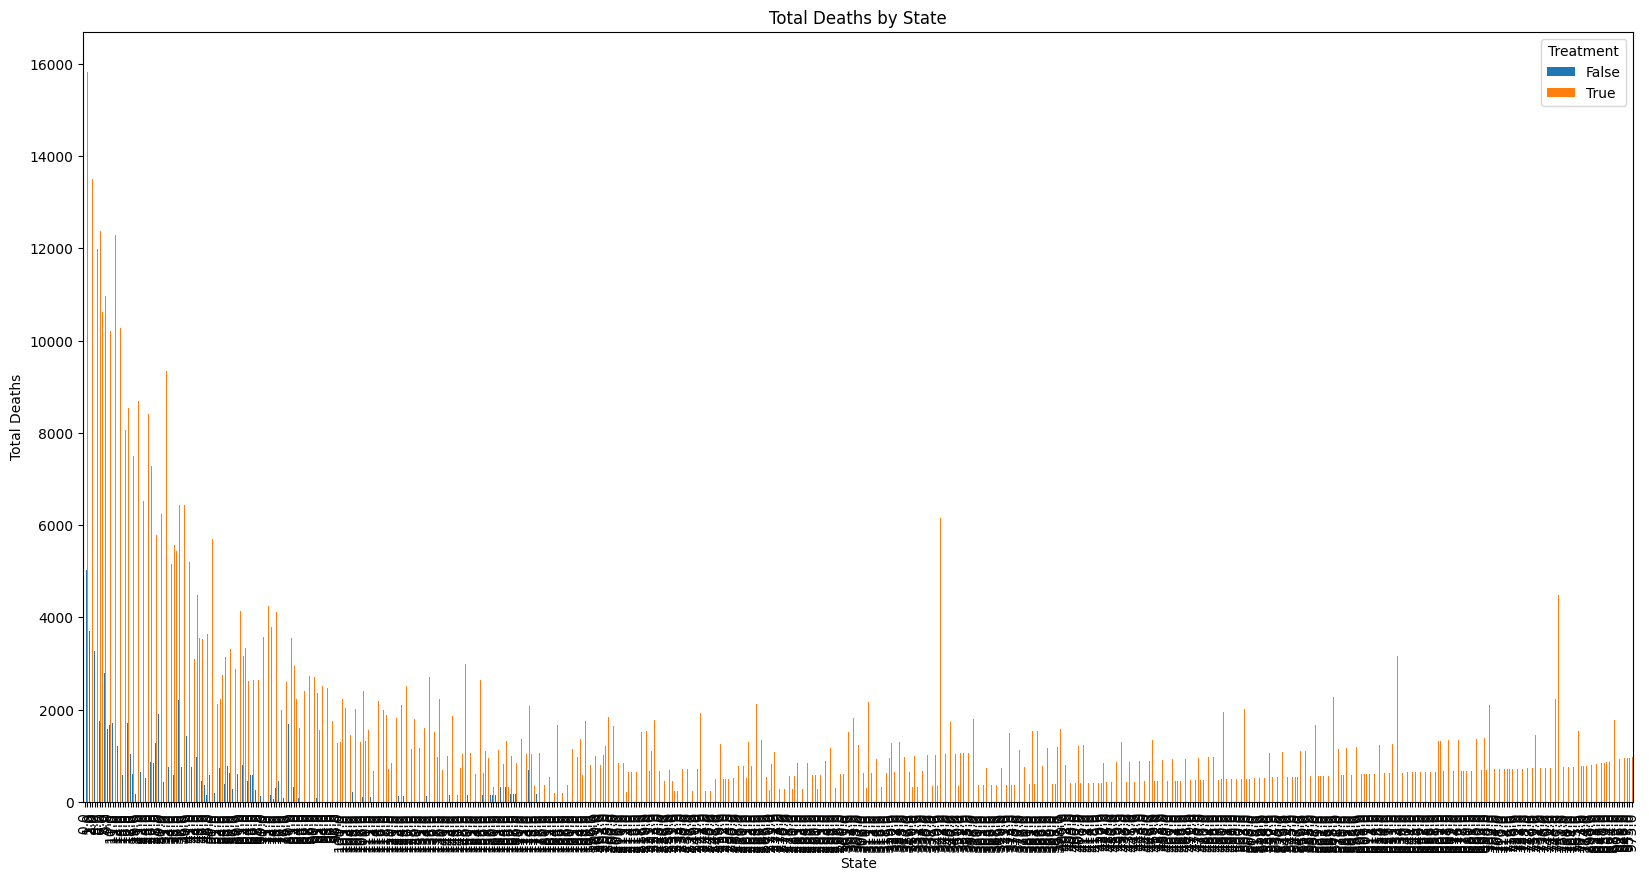

In [24]:
#plot of deaths by state where theyre colored by treatment
combined_df.groupby(['deaths', 'Treatment'])['deaths'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Deaths by State')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.show()

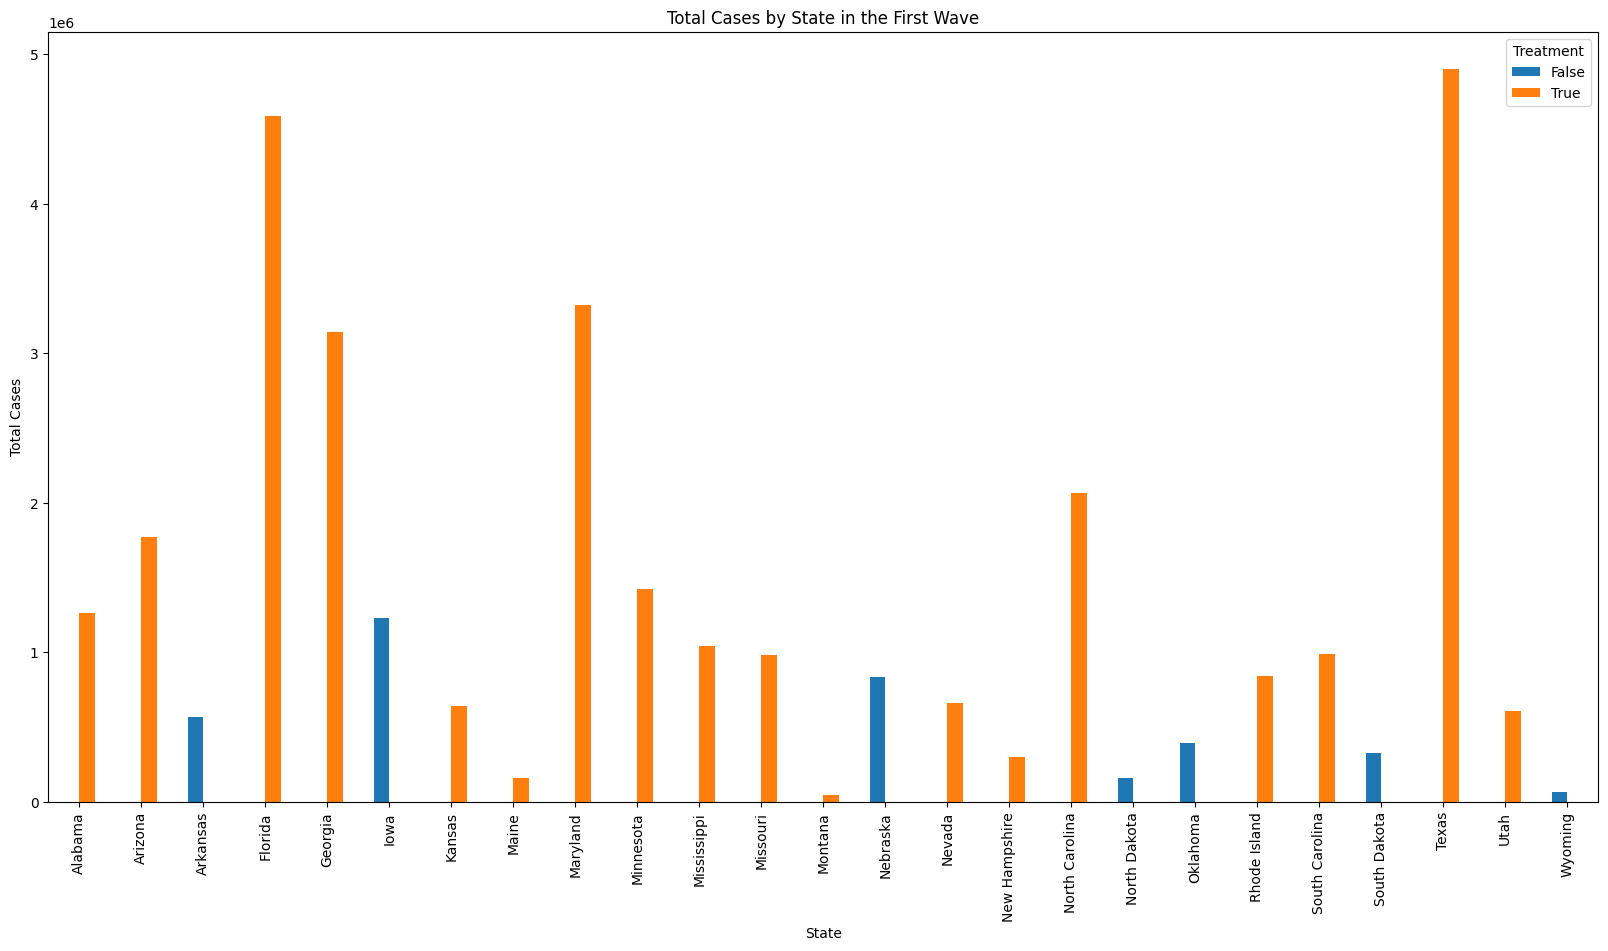

In [27]:
#plot sum of cases per state by treatment in a bar graph
combined_df.groupby(['state', 'Treatment'])['cases'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Cases by State in the First Wave')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.show()


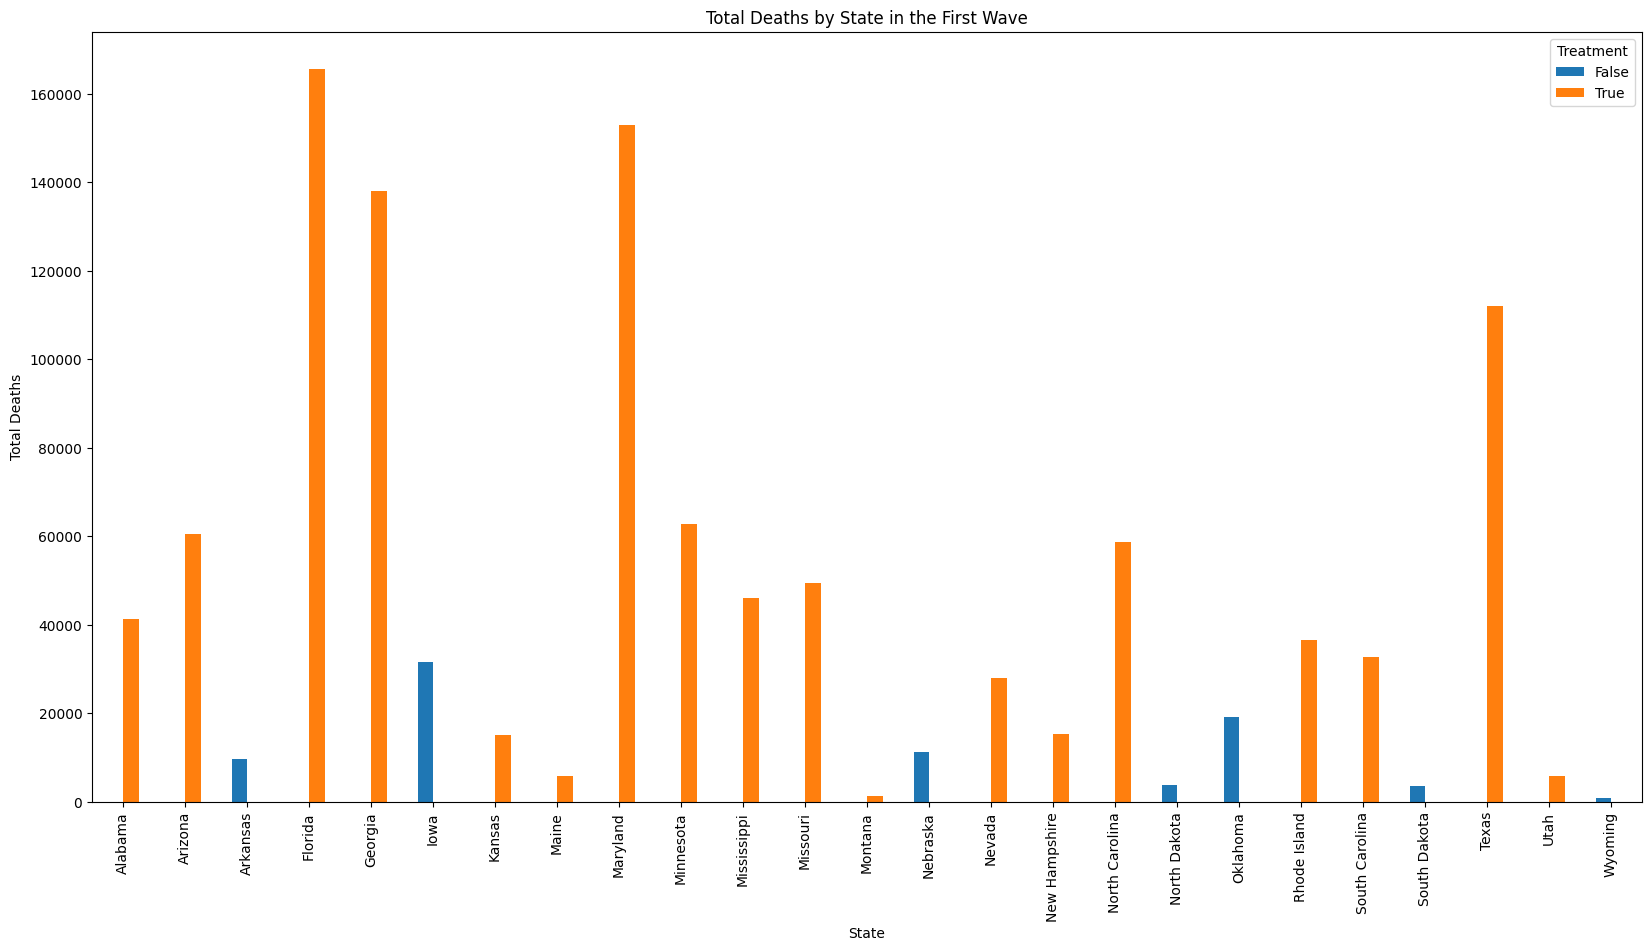

In [30]:
#plot sum of cases per state by treatment in a bar graph
combined_df.groupby(['state', 'Treatment'])['deaths'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Deaths by State in the First Wave')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.show()